**importing the necessary packages**

In [41]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading data from remote link**

In [42]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("Data imported successfully")


Data imported successfully


**sample data**

In [43]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**plotting the distribution of scores w.r.t hours v/s percentage**

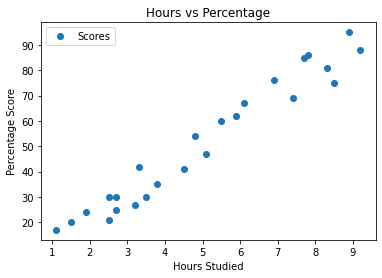

In [44]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**splitting the data into independent and dependent variables**

In [45]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

**splitting the data using sklearn model selection**

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**fitting the regression line using linear regression method**

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**plotting the regression line**

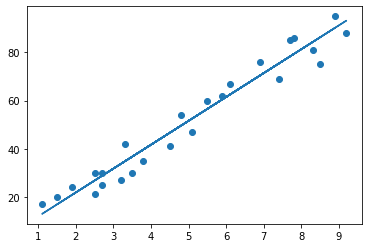

In [48]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**predicting the test data**

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**comparing Acutal vs Predicted data**

In [50]:
# Comparing Actual vs Predicted
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
result

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**plotting the grid to depict the actual and predicted value**

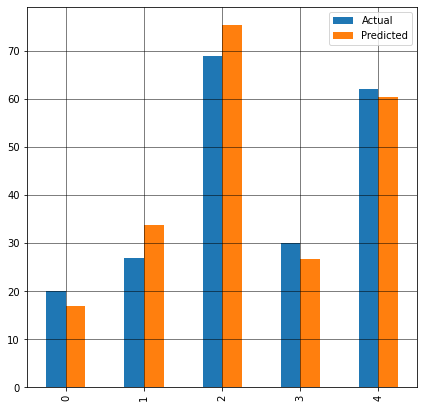

In [51]:
#plotting the grid to depict the actual and predicted value
result.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

**predicting the score for 9.25 hrs per day study**

In [52]:
# Testing with some new data
hours = 9.25
predicted_score = np.array([hours])
predicted_score = predicted_score.reshape(-1, 1)
own_pred = regressor.predict(predicted_score)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [53]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
